In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const

In [2]:
from scipy import stats

In [3]:
from numpy import random

# Question 2

Q = F(S+B) + D + Z
$$
\begin{align*}
\sigma_Q &= \sqrt{\left(\frac{\partial{Q}}{\partial{F}}\right)^2\sigma_F^2 + \left(\frac{\partial{Q}}{\partial{S}}\right)^2\sigma_S^2 + \left(\frac{\partial{Q}}{\partial{B}}\right)^2\sigma_B^2 + \left(\frac{\partial{Q}}{\partial{D}}\right)^2\sigma_D^2 + \left(\frac{\partial{Q}}{\partial{Z}}\right)^2\sigma_Z^2} \\
&= \sqrt{(S+B)^2\sigma_F^2 + F^2\sigma_S^2 + F^2\sigma_B^2 + \sigma_D^2 + \sigma_Z^2}
\end{align*}
$$

# Question 3

In [4]:
def gaussian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.))) / (sigma * np.sqrt(2 * np.pi))

def poisson(x, mu):
    return np.array([np.power(mu, i) * np.exp(-mu) / np.math.factorial(i) for i in x])

/var/folders/g2/_y9d810911sd9s_tphn029ph0000gr/T/ipykernel_86705/2378781699.py:5: DeprecationWarning: Using factorial() with floats is deprecated
  return np.array([np.power(mu, i) * np.exp(-mu) / np.math.factorial(i) for i in x])


Text(0, 0.5, 'pmf or pdf')

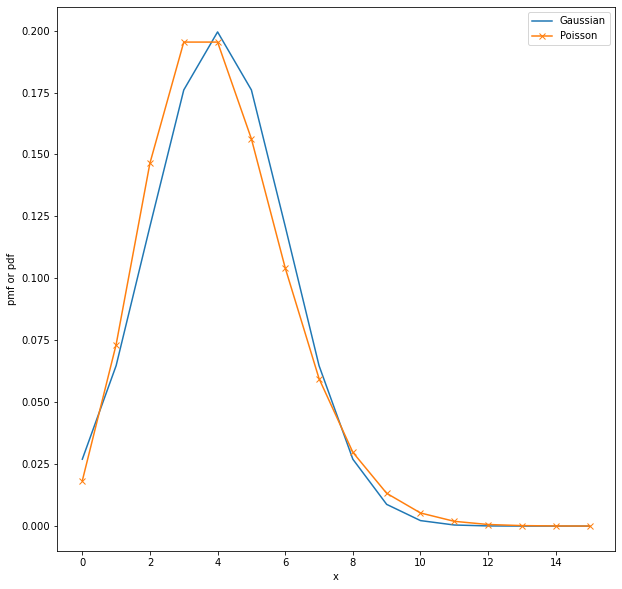

In [25]:
mu = 4.0
std = 2
x = np.arange(0, mu*4, 1)
fgau = gaussian(x, mu, std)
fpoi = poisson(x, mu)

plt.figure(figsize=(10, 10))
plt.plot(x, fgau, label='Gaussian')
plt.plot(x, fpoi, '-x', label='Poisson')
plt.legend()
plt.xlabel('x')
plt.ylabel("pmf or pdf")

From the plot above, we could observe that the peak of the Poisson distribution is shifted to the left comparing to the Gaussian distribution. The general pmf of the Poisson is shifted to the left compare to the Gaussian pdf as well. 

/var/folders/g2/_y9d810911sd9s_tphn029ph0000gr/T/ipykernel_86705/2378781699.py:5: DeprecationWarning: Using factorial() with floats is deprecated
  return np.array([np.power(mu, i) * np.exp(-mu) / np.math.factorial(i) for i in x])


Text(0, 0.5, 'pmf or pdf')

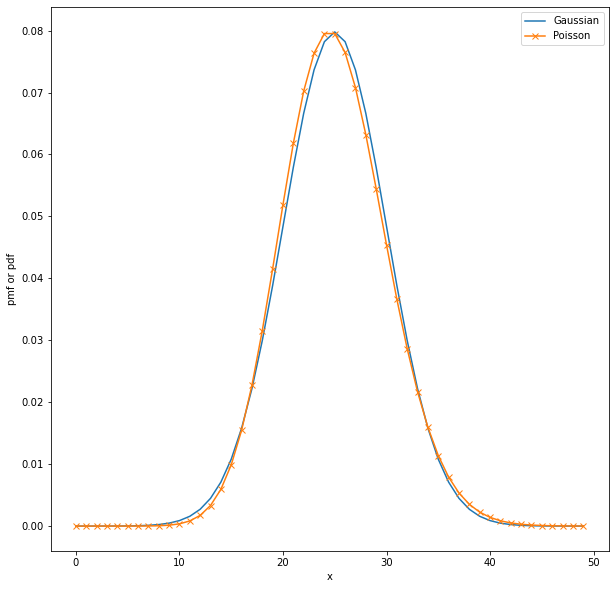

In [26]:
mu = 25.0
std = 5
x = np.arange(0, mu*2, 1)
fgau = gaussian(x, mu, std)
fpoi = poisson(x, mu)

plt.figure(figsize=(10, 10))
plt.plot(x, fgau, label='Gaussian')
plt.plot(x, fpoi, '-x', label='Poisson')
plt.legend()
plt.xlabel('x')
plt.ylabel("pmf or pdf")

As x increases, we see that Poisson distribution, which is a discrete variable, is very close to a Gaussian Distribution, which is a continuous variable. When x > 15, Poisson distribution can be approximated by a Gaussian Distribution. 

# Question 4

In [7]:
mu = 0.
std = 1.
dx = 0.0001
x = np.arange(-10, 10, dx)

In [8]:
fgaus = gaussian(x, mu, std)

In [9]:
np.sum(fgaus * dx)

1.0000000000023306

In [10]:
# For one sigma
sigma_1 = (-1 < x) & (x < 1)
Prob_out1sigma = 1 - np.sum(fgaus[sigma_1]*dx)
print(f"Probability of a result more than 1sigma from mean: {Prob_out1sigma}")

# For three sigma
sigma_3 = (-3 < x) & (x < 3)
Prob_out3sigma = 1 - np.sum(fgaus[sigma_3]*dx)
print(f"Probability of a result more than 3sigma from mean: {Prob_out3sigma}")

# For five sigma
sigma_5 = (-5 < x) & (x < 5)
Prob_out5sigma = 1 - np.sum(fgaus[sigma_5]*dx)
print(f"Probability of a result more than 5sigma from mean: {Prob_out5sigma}")

Probability of a result more than 1sigma from mean: 0.3173105082657348
Probability of a result more than 3sigma from mean: 0.002699796083157069
Probability of a result more than 5sigma from mean: 5.733008254793504e-07


# Question 5

$$S/N = \frac{R_s t}{\sqrt{R_s t + n_{pix}(R_B t + R_D t + N_R^2)}}$$
For multiple exposures N each with length t, the S/N ratio becomes
$$S/N = \frac{\sqrt{N}R_s t }{\sqrt{R_s t + n_{pix}(R_B t + R_D t + N_R^2)}}$$
Where 
$$R_s = 0.2\ ph/s$$
$$R_B = 0.5\ ph/s/pixel$$ 
$$R_D = 10\ e/hr/pix = 1/360\ e/s/pix$$
$$N_R = 5\ e$$
$$n_{pix}=4$$
$$t=1\ min = 60\ sec$$
Then, the SNR is 
$$S/N = \frac{\sqrt{N}0.2 *60 }{\sqrt{0.2 * 60 + 4(0.5* 60 + 1/360 *60 + 5^2)}}$$
If we want $S/N = 100$, solving for N, we have
$$\boxed{N=16158}$$

In [11]:
N = ((100 * np.sqrt(0.2 * 60 + 4*(0.5* 60 + 1/360 *60 + 5**2))) / (0.2*60))**2
print(N)

16157.407407407409


# Question 6

For V band, the extinction is 0.2 mag/airmass. From WIRO website, assuming the star is capture in the lower left quadrant (LL)
$$R_D = 0.01\ ADU/s/pixel*2.66\ e/ADU= 0.0266\ e/s/pixel$$
$$N_R = 5.4$$
The bandwith of the Johnson V filter is 
$$\Delta\lambda_V = 980\ A$$

Assuming we are aiming for a Nyquist sampling with seeing=1.1
$$1.1/2=0.55\ ''/pix$$
(Note that using the plate scale to calculate, WIRO has a scale 0.58''/pix, which is quite similar to 0.55\ ''/pix)
Each filter is $3.5''$. Then the number of pixels we need 
is
$$n_{pix} = 3.5 / 0.55 = 6.36\approx 7\ pix$$
For V=22 mag star with 0.2 mag extinction, the photon energy can be calculated as 
$$
\begin{align*}
\Phi_\lambda &= \Phi_{V,0}\times 10^{-m/2.5} \\
&= 995.5\times 10^{-(22+0.2)/2.5} \\
&= 1.3123 \times 10^{-6}\ ph/cm^2/s/A
\end{align*}
$$
Given that we only take 1 quadrant, the area is then $(2.3/2)^2*\pi/4=1.0386\ m^2=10386\ cm^2$
$$
R_{S,emit} = \Phi_\lambda * A * \Delta\lambda_V = 1.3123 \times 10^{-6} * 10386*980 = 8.8825\ ph/s
$$
For full moon, the magnitude of the full moon is 
$$V = 20\ mag/sq arcsec$$
Then, the background photon flux is 
$$
\begin{align*}
\Phi_B &= \Phi_{V,0}\times 10^{-m/2.5} \\
&= 995.5\times 10^{-(20+0.2)/2.5} \\
&= 8.2802 \times 10^{-6}\ ph/cm^2/s/A/sq arcsec \\
&= 2.5048 \times 10^{-6}\ ph/cm^2/s/A/pix
\end{align*}
$$
Similarly, the photon count is 
$$
R_{B,emit} = \Phi_B * A * \Delta\lambda_V = 25.494
$$
Taking the quantum and system efficiency into account,
$$R_s = R_{S,emit} * QE * SE = 4.252 * 0.95 * 0.7 = 2.8276\ ph/s$$
$$R_B = R_{B,emit} * QE * SE = 25.494 * 0.95 * 0.7 = 16.953\ ph/s$$
Then, the SNR is 
$$
\begin{align*}
S/N &= \frac{R_s t}{\sqrt{R_s t + n_{pix}(R_B t + R_D t + N_R^2)}} \\
&= \frac{2.8276 t}{\sqrt{2.8276 t + 7(16.953 t + 0.0266 t + 5.4^2)}}
\end{align*}
$$
With $S/N = 100$, solving for t, we have
$$t = 152196.678\ seconds$$
Given this long time and high background photon rate, this is a background limited case. 

When the moon phase is new moon, the sky brightness of a new moon is 
$$V=21.8$$
Using the similar calculation
$$
\begin{align*}
R_B &= \Phi_B *  A * \Delta\lambda_V * QE * SE \\
&= \Phi_{V,0}\times 10^{-m/2.5} * 0.55^2  * A * \Delta\lambda_V * QE * SE \\
&= 995.5\times 10^{-(21.8+0.2)/2.5} * 0.55^2  *  10386 * 980 * 0.95 * 0.7 \\
&= 3.2304\ ph/s
\end{align*}
$$

$$
\begin{align*}
S/N &= \frac{R_s t}{\sqrt{R_s t + n_{pix}(R_B t + R_D t + N_R^2)}} \\
&= \frac{2.8276 t}{\sqrt{2.8276 t + 7(3.2304 t + 0.0266 t + 5.4^2)}}
\end{align*}
$$
With S/N=100, solving for t, we have
$$t = 32059.95\ seconds$$
This is still background limited case. 

In [12]:
from sympy import symbols, Eq, solve

In [13]:
B = 10386
dA = 980

In [14]:
2.5048e-6*B*dA*0.95 * 0.7

16.95387956976

In [15]:
995.5* 10**(-(21.8+0.2)/2.5) * B * dA  * 0.55**2 * 0.95 * 0.7

3.2304474640071827

In [16]:
(2.3/2)**2*np.pi/4

1.0386890710931251

In [17]:
t = symbols('t')
eq1 = Eq(2.8276*t / (2.8276*t + 7*(3.2304*t + 0.0266*t + 5.4**2))**0.5, 100)

In [18]:
solve(eq1, t)

[32059.9565474602]

# Question 7

## Source noise limited case
$$
S/N = \sqrt{R_s t}
$$ 
With a 10 minutes time, with S/N = 50 at Keck,
$$R_s = \frac{(S/N)^2}{t} = \frac{50^2}{10} = 250\ ph/min$$
Taking QE into account, 
$$R_{emit} = R_s/QE = 250 / 0.8 = 312.5\ ph/min$$
The diameter of Keck is 10 m
$$flux = \frac{R_{emit}}{A*\Delta \lambda} = \frac{312.5}{(10/2)^2*\pi*50} = 0.07958\ ph/min/m^2/A$$
With WIRO, QE=0.95, diameter is 2.3 m, $\Delta \lambda=980 A$
$$
\begin{align*}
t &= \frac{(S/N)^2}{R_s} \\
&= \frac{50^2}{flux * A * \Delta \lambda * QE} \\
&= \frac{50^2}{0.07958 * (2.3/2)^2*\pi*980 * 0.95} \\
&= 8.1218\ min
\end{align*}
$$

In [19]:
50**2/ (0.07957747154594767 * (2.3/2)**2*np.pi*980*0.95)

8.121843902221123

## Background limit case

$$S/N = \frac{R_S t}{\sqrt{n_{pix}(R_B t)}} = \frac{R_s}{\sqrt{n_{pix}R_B}}\sqrt{t} = r \sqrt{\frac{t}{n_{pix}}}$$
Where 
$$r=\frac{R_s}{\sqrt{R_B}}$$
If we can assume the ratio is fixed, i.e. both source and background flux are constant, so it depends only on the collecting area and bandwidth.

Also Keck has $8192 \times 8192$  pixels = 67108864 pixels, while WIRO has $4096 \times 4096$ pixels = 16777216 pixels

$$
\begin{align*}
\frac{t_{WIRO}}{t_{Keck}} &= \frac{n_{pix,WIRO}/r_{WIRO}^2}{n_{pix,Keck}/r_{Keck}^2}\\
&=\frac{n_{pix,WIRO}/(flux*QE_W*A_W*\Delta \lambda_W)^2}{n_{pix,Keck}/(flux*QE_K*A_K*\Delta \lambda_K)^2} \\
&= \frac{4096^2/(0.95*(2.3/2)^2*\pi*980)^2}{8192^2/(0.8*(10/2)^2*\pi*50)^2} \\
&= 1.12132 / 6.79955 \\
&= 0.1649
\end{align*}
$$
Then, the time using WIRO is 
$$t_{WIRO} = 0.1649*t_{Keck} = 0.1649 * 10 = 1.6491\ minutes $$

In [20]:
4096**2/(0.95*(2.3/2)**2*np.pi*980)**2

1.1213196354809516

In [21]:
8192**2/(0.8*(10/2)**2*np.pi*50)**2

6.799549533372671

In [22]:
1.1213196354809516 / 6.799549533372671

0.16491087093011608

In [23]:
1.1213196354809516 / 6.799549533372671 * 10

1.649108709301161